In [1]:
import tensorflow as tf
import os

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import model as model

Using TensorFlow backend.


In [2]:
# Size of the image data
SIZE = (96, 96)

train_datagen = ImageDataGenerator(rescale=1./255)

# Args for the training data generator. Both x and y should be identical,
# so they are put into a tuple
generator_args = dict(target_size=SIZE,
        batch_size=32,
        class_mode=None,
        color_mode='grayscale',
        seed=1)

generator_x = train_datagen.flow_from_directory(
        'bin/validate/compressed/', **generator_args)

generator_y = train_datagen.flow_from_directory(
        'bin/validate/uncompressed/', **generator_args)

Found 391 images belonging to 1 classes.
Found 391 images belonging to 1 classes.


In [3]:
model = model.get_model()
model.load_weights('weights.h5')

In [4]:
def reconstruct():
    thing_x = generator_x.next()
    thing_y = generator_y.next()
    prediction = model.predict(thing_x)
    
    plt.figure(figsize=(16, 16))

    def plot(tensor, n, title):
        ax = plt.subplot(1, 3, n)
        plt.title(title)
        plt.imshow(tensor.reshape(96, 96))
        plt.gray()
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)
        
    plot(thing_x[0], 1, 'Input')
    plot(prediction[0], 2, 'Prediction')
    plot(thing_y[0], 3, 'Ground Truth')
    
    plt.show()

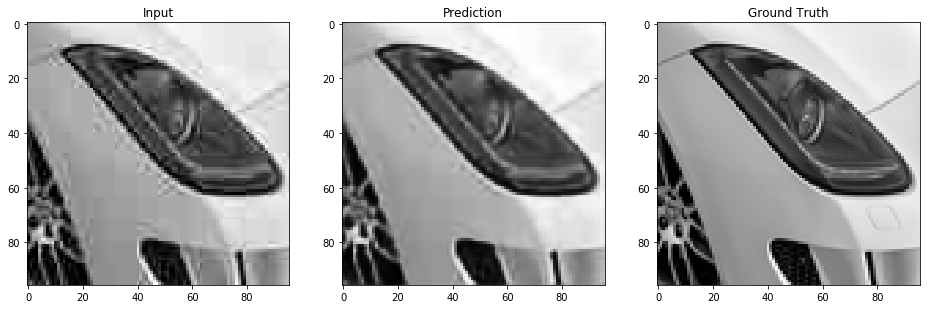

In [5]:
reconstruct()

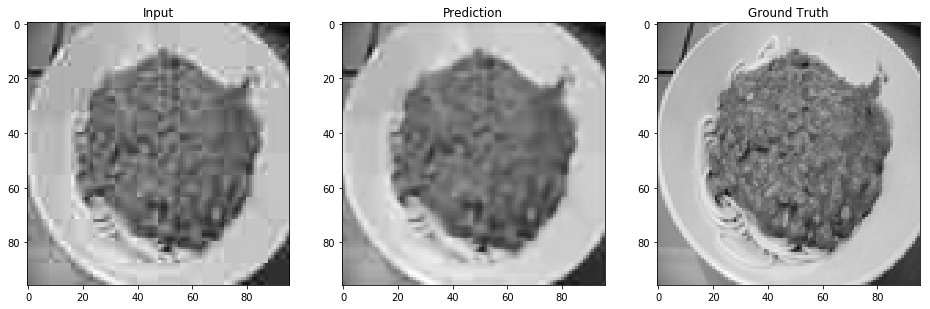

In [6]:
reconstruct()